In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import statistics

In [2]:
#function to calculate CV
cv = lambda x: np.std(x) / np.mean(x)*100

In [3]:
#Claculating weights ratio for both schemes...
prob=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95] #
diff=pd.DataFrame(columns=['0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50','0.55','0.60','0.65','0.70','0.75','0.80','0.85','0.90','0.95'])
list_diff=[]
for i in prob:
  list_diff=[]
  for j in prob:
    ipw_weights=((1/i)/(1/j))
    os_weights=((1-i)/(1-j))
    list_diff.append(os_weights-ipw_weights)
  diff.loc[len(diff)]=list_diff
diff.rename(index={0:0.05,1:0.10,2:0.15,3:0.20,4:0.25,5:0.30,6:0.35,7:0.40,8:0.45,9:0.50,10:0.55,11:0.60,12:0.65,13:0.70,14:0.75,15:0.80,16:0.85,17:0.90,18:0.95}, inplace=True)

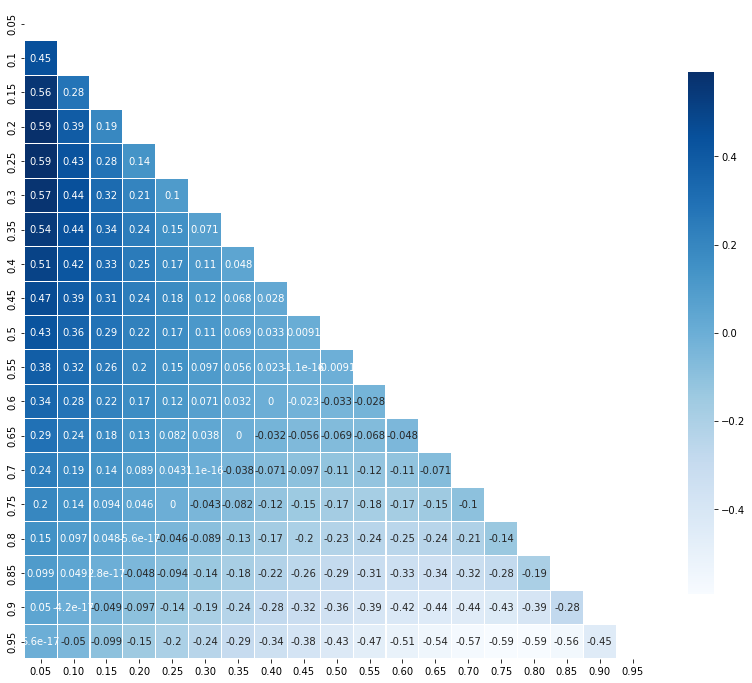

In [4]:
#Displaying weights ratio in heatmap
corr= diff.corr()
fig, ax = plt.subplots(figsize=(14, 12))
matrix = np.triu(corr)
sb.heatmap(diff, cmap="Blues",linewidth=0.1, mask=matrix,annot=True,cbar_kws={"shrink": .8})
plt.show()

In [5]:
#space of probabilities to generate combinations
list_probs = [0.10,0.20,0.30,0.40,0.50, 0.60, 0.70,0.80,0.90]

In [6]:
#Calculating CV for all possible comination for six samples
import itertools
a = [list_probs,list_probs,list_probs,list_probs,list_probs,list_probs]
b = list(itertools.product(*a))
cv_weights_all=[]
cv_ipw_all=[]
for i in list(b):
  list_weight=[]
  list_ipw=[]
  for j in range(len(i)):
    list_weight.append(1-i[j])
    list_ipw.append(1/i[j])
  #print(list_ipw)
  cv_weights_all.append(cv(list_weight))
  cv_ipw_all.append(cv(list_ipw))

In [7]:
print ('my scheme mean',statistics.mean(cv_weights_all))
print ('my scheme std',statistics.stdev(cv_weights_all))
print ('IPW mean',statistics.mean(cv_ipw_all))
print ('IPW std',statistics.stdev(cv_ipw_all))

my scheme mean 47.87300534645729
my scheme std 14.69834212616124
IPW mean 64.61811117359257
IPW std 24.186106996124156


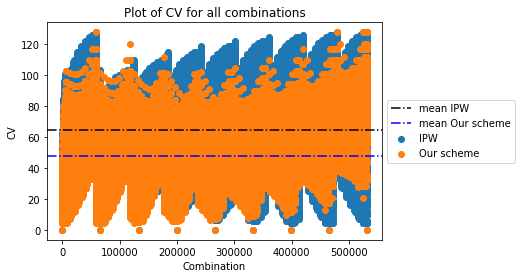

In [8]:
#Plotting CV for all combination for both schemes
samples= list(range(0, len(cv_weights_all)))
plt.scatter(samples,cv_ipw_all, label='IPW')
plt.scatter(samples,cv_weights_all, label='Our scheme')
plt.axhline(y = statistics.mean(cv_ipw_all), color = 'k', linestyle = 'dashdot', label='mean IPW')
plt.axhline(y = statistics.mean(cv_weights_all), color = 'b', linestyle = 'dashdot',label='mean Our scheme')
plt.xlabel('Combination')
plt.ylabel('CV')
plt.title('Plot of CV for all combinations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

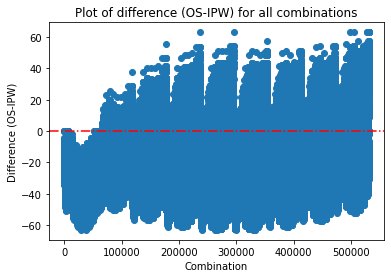

In [9]:
#plotting difference of CVs for all combination (OS-IPW)
dif=list(np.array(cv_weights_all)-np.array(cv_ipw_all))
plt.scatter(samples,dif)
plt.xlabel('Combination')
plt.ylabel('Difference (OS-IPW)')
plt.title('Plot of difference (OS-IPW) for all combinations')
plt.axhline(y = 0, color = 'r', linestyle = 'dashdot')
#plt.plot(dif)

In [10]:
#percentage of values where our scheme CV is less than IPW
count = sum(map(lambda x : x< 0, dif))
print (count/len(dif))
print ('Mean of difference',statistics.mean(dif))

0.7482166411699511
Mean of difference -16.745105827135273


Text(0.5, 1.0, 'Sorted plot of CV for all combinations')

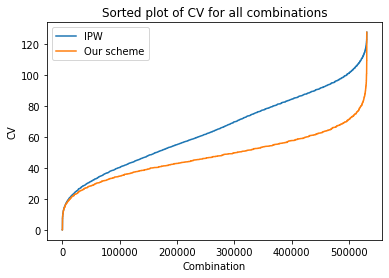

In [11]:
#plotting sorted CVs for both schemes for all combinations
cv_weights_all2=cv_weights_all
cv_weights_all2.sort()
cv_ipw_all2=cv_ipw_all
cv_ipw_all2.sort()
plt.plot(cv_ipw_all2,label='IPW')
plt.plot(cv_weights_all2,label='Our scheme')
plt.xlabel('Combination')
plt.ylabel('CV')
plt.legend()
plt.title('Sorted plot of CV for all combinations')